In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("breast-cancer.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#check tipe data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#MEMULAI DATA PREPARATION

In [ ]:
#mengecek value yang hilang
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.drop('id', axis=1, inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Exploraty Data Analysis(EDA)
#Univariate Analysis

<Axes: xlabel='diagnosis', ylabel='Count'>

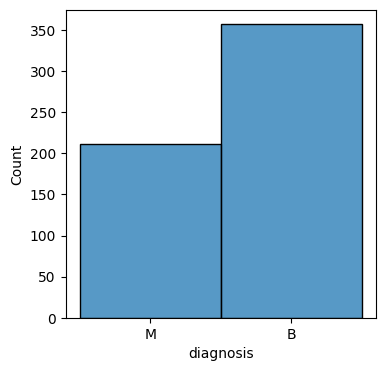

In [ ]:
# Bar Chart - Attribute diagnosis

plt.figure(figsize=(4,4))
sns.histplot(data["diagnosis"])

<Axes: xlabel='radius_mean', ylabel='Count'>

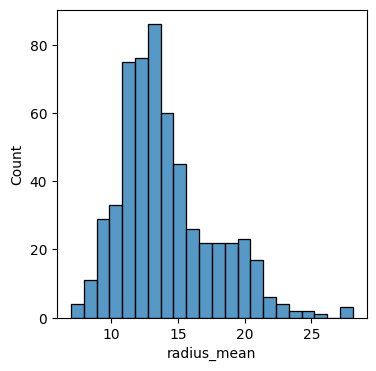

In [ ]:
# Histogram Bar - Attribute radius_mean

plt.figure(figsize=(4,4))
sns.histplot(data['radius_mean'])

<Axes: >

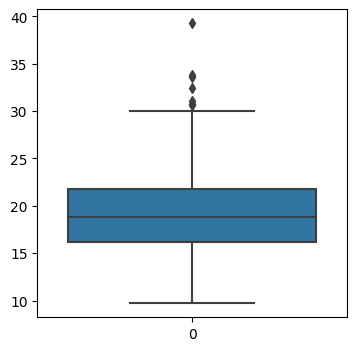

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data['texture_mean'])

In [ ]:
#Bivariate Analysis

<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

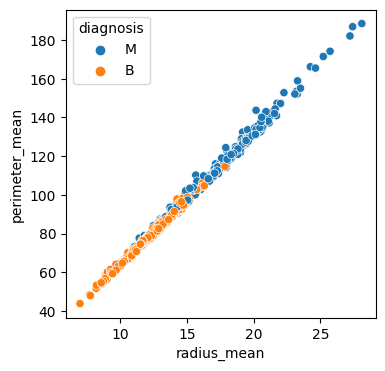

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=data['radius_mean'], y=data['perimeter_mean'], hue=data['diagnosis'])

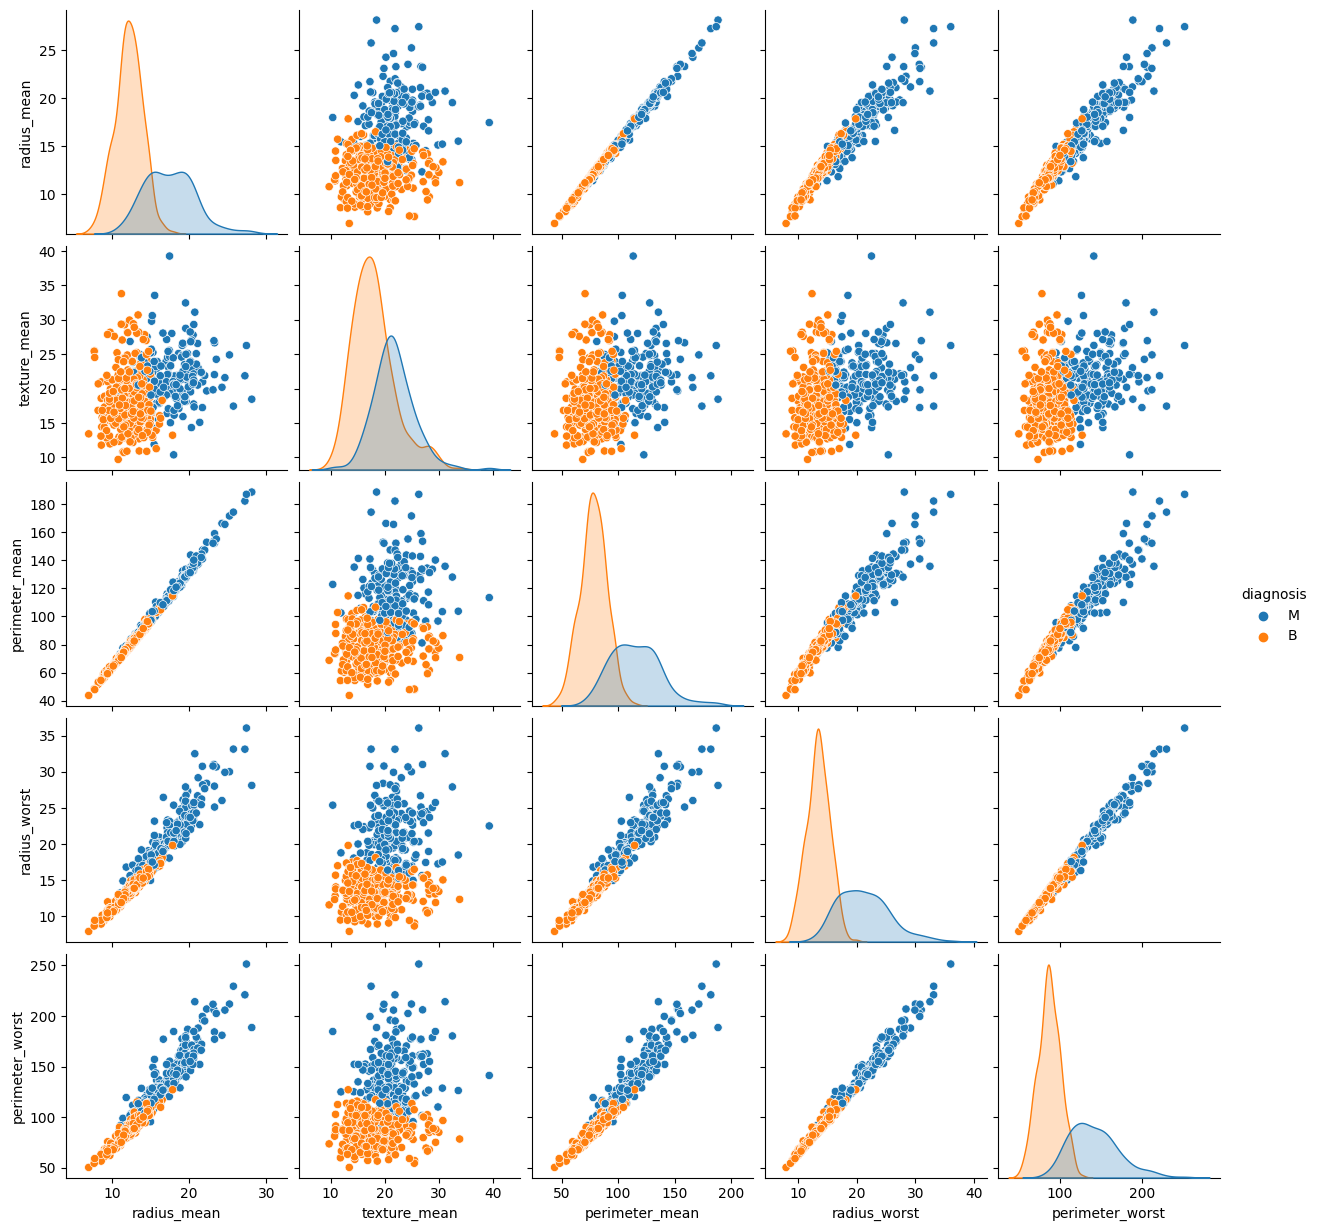

In [ ]:
# pairplot

sns.pairplot(data, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

In [ ]:
#Multivariate Analysis

<ipython-input-117-a620b46844c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')


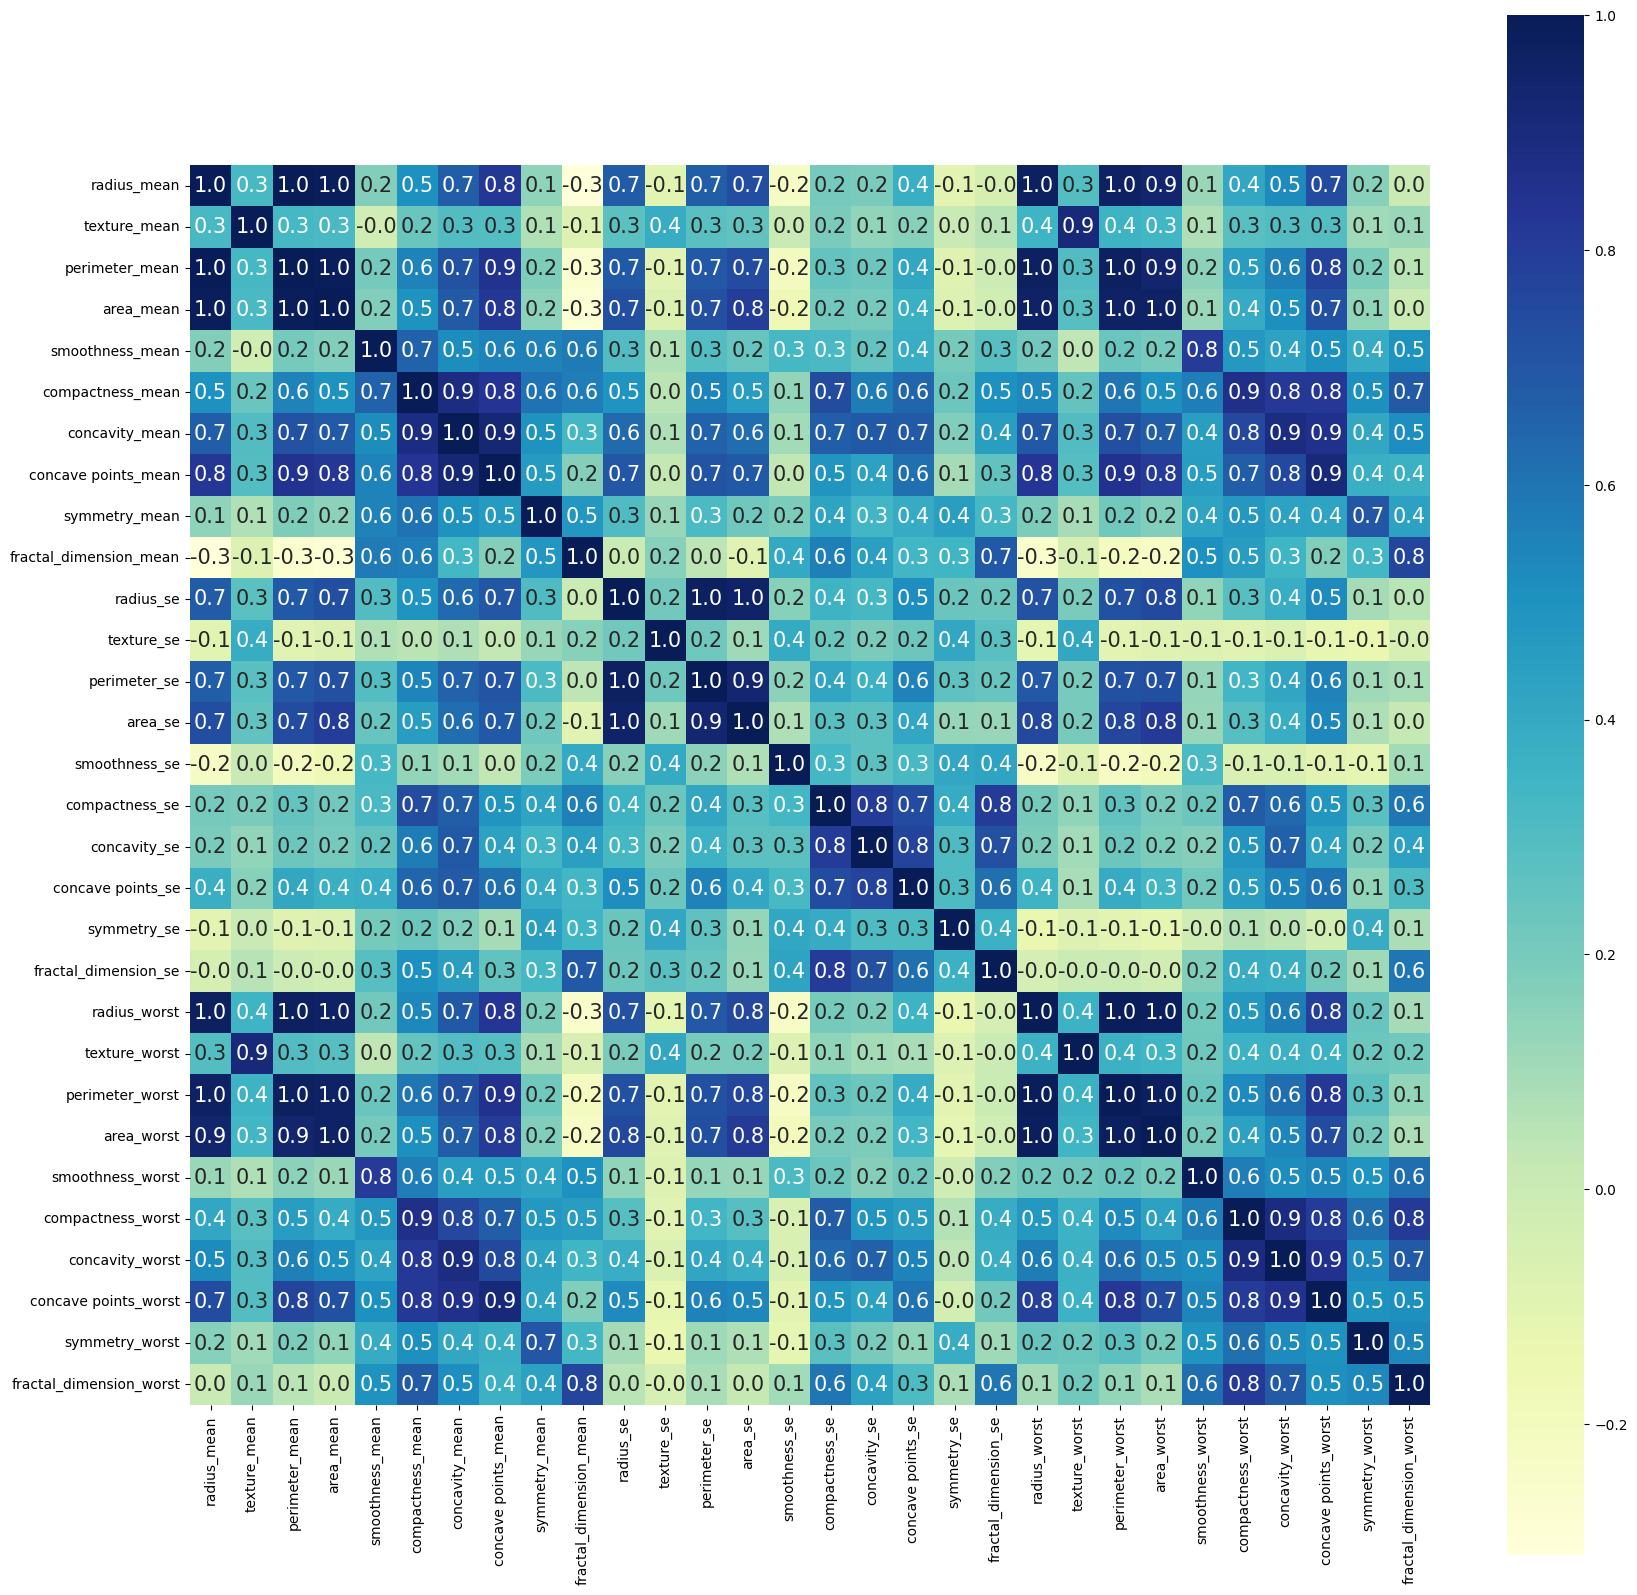

In [ ]:
# Plotting heatmap based on correlation between attributes

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

In [ ]:
#Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# library to divide the dataset into training data and testing data
from sklearn.model_selection import train_test_split

#library to calculate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Separate between attributes (independent, feature) and class (dependent)
x = data.drop(columns='diagnosis')
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = data['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
# Separate data into training data and testing data, with a proportion of 70% training data, and 30% testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

print('data training:')
print(xtrain.shape)
print(ytrain.shape)
print('--------------')
print('data testing:')
print(xtest.shape)
print(ytest.shape)

data training:
(398, 30)
(398,)
--------------
data testing:
(171, 30)
(171,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [ ]:
xtrain_norm = mms.fit_transform(xtrain)
xtest_norm = mms.transform(xtest)
xtest_norm

array([[0.23404672, 0.30064254, 0.23366153, ..., 0.36828737, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53695776, ..., 0.64912917, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38070776, ..., 0.54934688, 0.25073921,
        0.21320787],
       ...,
       [0.10837945, 0.28238079, 0.11601027, ..., 0.3595791 , 0.206781  ,
        0.51848084],
       [0.30016161, 0.49983091, 0.31385559, ..., 0.55188679, 0.41119653,
        0.53628349],
       [0.2546158 , 0.14879946, 0.26120148, ..., 0.56640058, 0.21170905,
        0.53204476]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_norm, ytrain)
ypred = knn.predict(xtest_norm)
print(accuracy_score(ypred,ytest))

0.9649122807017544


In [ ]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(xtrain_norm, ytrain)
ypred = dt.predict(xtest_norm)
print(accuracy_score(ypred,ytest))

0.9473684210526315


In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [ ]:
xtrain_std = stdsc.fit_transform(xtrain)
xtest_std = stdsc.transform(xtest)
xtest_std

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_std, ytrain)
ypred = knn.predict(xtest_std)
print(accuracy_score(ypred,ytest))

0.9590643274853801


In [ ]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(xtrain_std, ytrain)
ypred = dt.predict(xtest_std)
print(accuracy_score(ypred,ytest))

0.9473684210526315


In [ ]:
#KNN

In [ ]:
# import library k-NN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# using the k-NN algorithm, with the value of k being 5, calculating the euclidean distance (p=2)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='euclidean')
knn.fit(xtrain, ytrain)
ypredknn = knn.predict(xtest)
ypredknn

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [ ]:
# calculate accuracy value
print(accuracy_score(ytest, ypredknn))

0.9532163742690059


In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,x,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy_Rate')

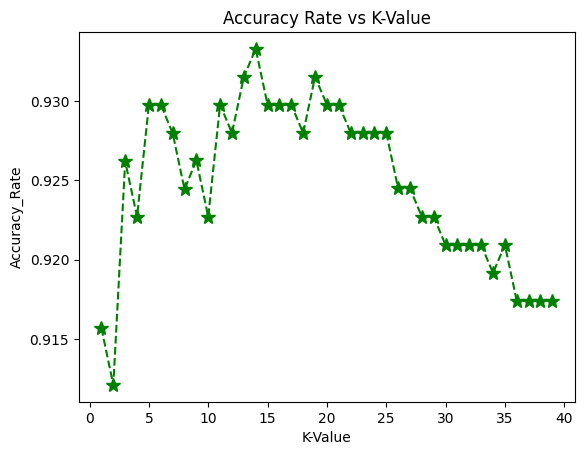

In [ ]:
plt.plot(range(1,40),accuracy_rate, color= 'green',linestyle = 'dashed',marker='*', markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_Rate')

In [ ]:
#DECISION TREE

In [ ]:
# import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# using the Decision Tree algorithm
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypreddt = dt.predict(xtest)

In [ ]:
ypreddt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [ ]:
print(accuracy_score(ytest, ypreddt))

0.9181286549707602


In [ ]:
#Evaluasi

In [ ]:
#Comparison of k-NN Algorithms, and Decision Trees
models = [knn, dt]
nilai_akurasi = []
for model in models:
    ypred = model.predict(xtest)
    akurasi = accuracy_score(ytest, ypred)
    nilai_akurasi.append(akurasi)
print(nilai_akurasi)

[0.9532163742690059, 0.9181286549707602]


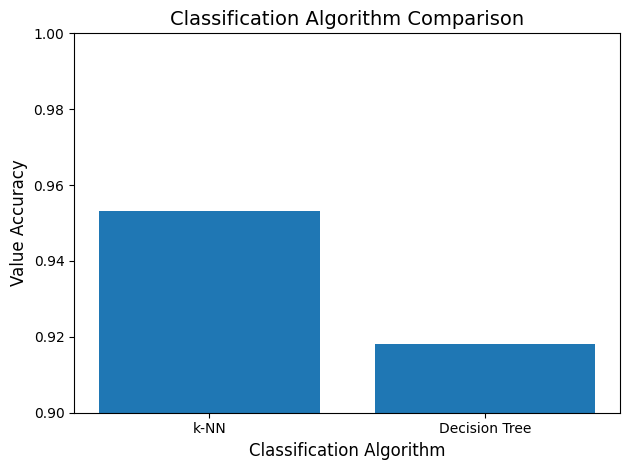

In [ ]:
plt.bar(['k-NN', 'Decision Tree'], nilai_akurasi)
plt.ylim(0.90, 1.00)
plt.title("Classification Algorithm Comparison", fontsize=14)
plt.xlabel('Classification Algorithm', fontsize=12)
plt.ylabel('Value Accuracy', fontsize=12)
plt.tight_layout()
plt.show()